In [47]:
%%capture
%run 03_Tokens_into_Token_IDs.ipynb

In [48]:
def add_special_tokens(unique_tokens, special):
    for token in special:
        if token not in unique_tokens:
            unique_tokens.append(token)

In [50]:
add_special_tokens(unique_tokens, ["<|endoftext|>", "<|unk|>"])

In [53]:
vocab = {token:integer for integer,token in enumerate(unique_tokens)}

In [55]:
print("Vocab Size =>", len(vocab.items()))
for vocab_item in list(vocab.items())[-5:]:
    print(vocab_item)

Vocab Size => 1132
('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [56]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.encoder = vocab
        self.decoder = {idx: token for token, idx in self.encoder.items()}

    def encode(self, text):
        pattern = r'([,.:;?!()_]|--|\s)'
        input_text = re.split(pattern, text)

        tokens = [word.strip() for word in input_text if word.strip()]
        tokens = [token if token in self.encoder else "<|unk|>" for token in tokens]

        idx = [self.encoder[token] for token in tokens]
        return idx

    def decode(self, idx):
        text = " ".join([self.decoder[id] for id in idx])
        text = re.sub(r'\s+([,.:;?!()_])', r'\1', text)
        return text

In [59]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))

In [60]:
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [61]:
tokenizer = SimpleTokenizerV2(vocab)

ids = tokenizer.encode(text)

In [63]:
print("Encoded Text =>", ids)
print("Decoded Text =>", tokenizer.decode(ids))

Encoded Text => [1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]
Decoded Text => <|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


<div align="center">
  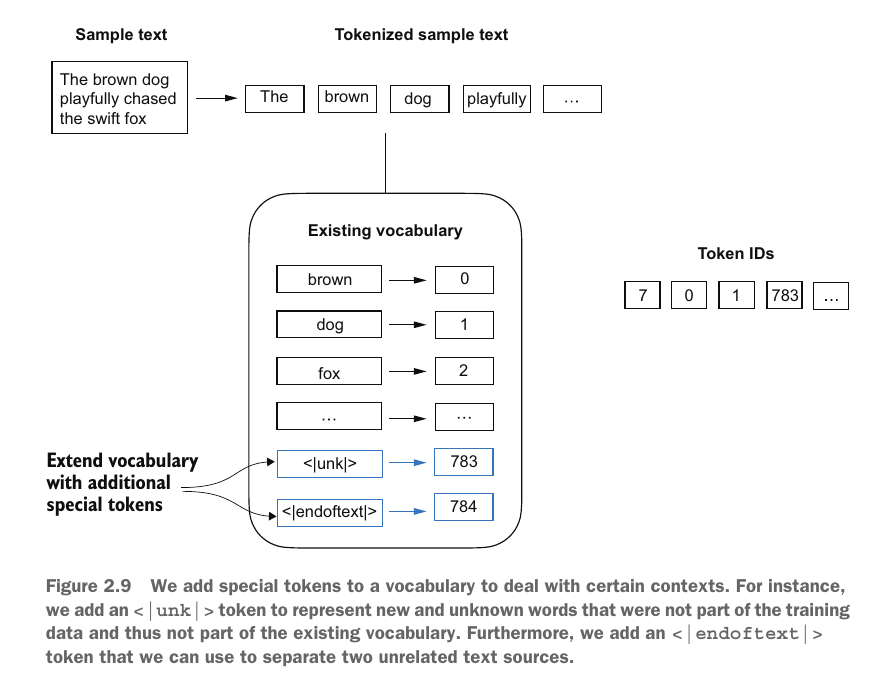
</div>